In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

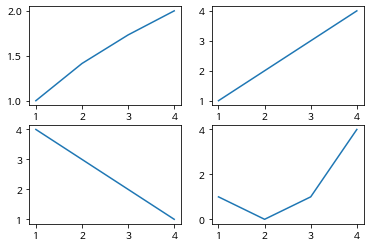

In [2]:
# 복수 그래프 그리기
x = np.arange(1,5)

plt.subplot(2,2,1)  # nrow = 2, ncol = 1, index= 1
plt.plot(x, np.sqrt(x))
plt.subplot(2,2,2)
plt.plot(x, x)
plt.subplot(2,2,3)
plt.plot(x, -x+5)
plt.subplot(2,2,4)
plt.plot(x, (x-2)**2)

plt.show()

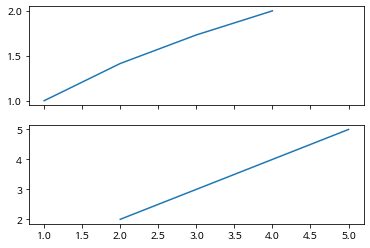

In [3]:
# 복수 그래프 그리기 - 축 공유
x = np.arange(1,5)

ax1 = plt.subplot(2, 1, 1)
plt.plot(x, np.sqrt(x))
plt.xticks(visible = False)
ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.plot(x+1, x+1)

plt.show()

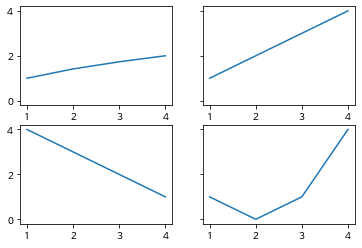

In [4]:
# 객체 지향 인터페이스 기본
fig, ax = plt.subplots(
    2, 2,  # 그래프 갯수 지정
    sharex = 'row',  # 중복된 x축 한번만 표시, True | *False | all | none | row | col
    sharey = True,
)
x = np.arange(1, 5)
ax[0][0].plot(x, np.sqrt(x))
ax[0][1].plot(x, x)
ax[1][0].plot(x, -x+5)
ax[1][1].plot(x, (x-2) ** 2)

plt.show()

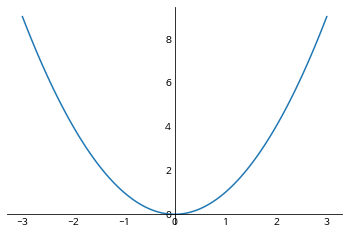

In [5]:
# 축 위치, 눈금 세팅
fig, ax = plt.subplots()

ax.spines['left'].set_position('center')  # 왼쪽 축을 가운데로 이동
ax.spines['right'].set_visible(False)  # 오른쪽 축을 보이지 않게
ax.spines['top'].set_visible(False)  
ax.spines['bottom'].set_position(('data', 0))  # 아래 축을 0 위치로 이동
ax.tick_params('both', length = 0)  # tick 눈금 길이 0

x = np.linspace(-3, 3, 100)
ax.plot(x, x**2)

plt.show()

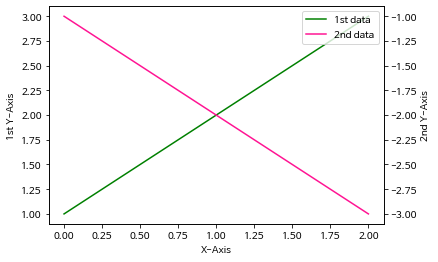

In [6]:
# 이중 축 표시하기
x = np.arange(0,3)
y1 = x+1
y2 = -x-1

fig, ax1 = plt.subplots()
line1 = ax1.plot(x, y1, color = 'g', label = '1st data')
ax1.set_xlabel('X-Axis')
ax1.set_ylabel('1st Y-Axis')

ax2 = ax1.twinx()
line2 = ax2.plot(x, y2, color = 'deeppink', label = '2nd data')
ax2.set_ylabel('2nd Y-Axis')

lines = line1 + line2  # 두 축에 대한 범례를 하나의 텍스트 상자에 표시하기, 이를 위해서는 라인도 객체로 지정 필요
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

plt.show()

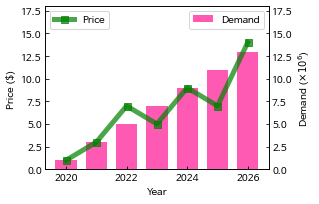

In [7]:
# 두 종류의 그래프 그리기
x = np.arange(2020, 2027)
y1 = np.array([1, 3, 7, 5, 9, 7, 14])
y2 = np.array([1, 3, 5, 7, 9, 11, 13])

fig, ax1 = plt.subplots(figsize=[4, 3])
ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax1.set_ylim(0, 18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($)')
ax1.tick_params(axis='both', direction='in')

ax2=ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0,18)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder()+10)  # 그래프 순서 지정
ax1.patch.set_visible(False)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()

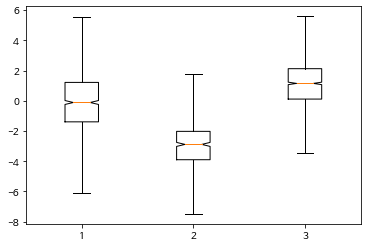

In [8]:
# 박스 플롯 그리기 : 1사분위와 3사분위를 박스로 표시, 박스 높이의 whis(default : 1.5) 만큼 위아래로 수염, 바깥은 outlier로 표시
np.random.seed(0)
data_a = np.random.normal(0, 2, 1000)
data_b = np.random.normal(-3, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

fig, ax = plt.subplots()
ax.boxplot([data_a, data_b, data_c],
           notch=True,  # 중앙값의 95% 신뢰 구간을 노치 형태로 표시, True | *False
           whis = 2.5,  # 수염 길이
           vert = True,  # 수직 방향, *True | False
          )

plt.show()

whiskers: [array([-1.39684012, -6.09228611]), array([1.2139012 , 5.51871023]), array([-3.90406317, -7.49191929]), array([-2.02661826,  1.75646216]), array([ 0.11032143, -3.47528489]), array([2.1221751 , 5.59364436])]
medians: [array([-0.11605607, -0.11605607]), array([-2.89070397, -2.89070397]), array([1.14767116, 1.14767116])]
fliers: [array([], dtype=float64), array([], dtype=float64), array([], dtype=float64)]


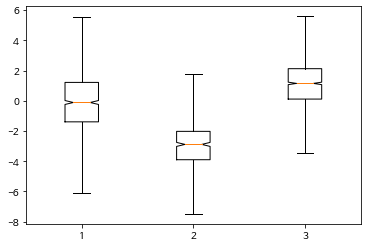

In [9]:
# 박스 플롯 값 반환하기
np.random.seed(0)
data_a = np.random.normal(0, 2, 1000)
data_b = np.random.normal(-3, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

fig, ax = plt.subplots()
box = ax.boxplot([data_a, data_b, data_c], notch=True, whis = 2.5)

whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]

print('whiskers:', whiskers)
print('medians:', medians)
print('fliers:', fliers)

plt.show()

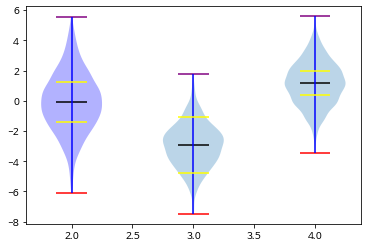

In [10]:
# 바이올린 플롯 그리기 : 바이올린의 형태로 시각화
np.random.seed(0)
data_a = np.random.normal(0, 2, 1000)
data_b = np.random.normal(-3, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

fig, ax = plt.subplots()
violin = ax.violinplot([data_a, data_b, data_c],
                       positions = [2, 3, 4],
                       showmeans = True,  # 평균값 표시,  True | *False
                       showextrema = True,  # 최대/최소값 표시, *True | False
                       showmedians = False,  # 중간값 표시,  True | *False
                       quantiles = [[0.25, 0.75], [0.1, 0.9], [0.3, 0.7]],  # 분위수 표시(각각)
                      )

violin['bodies'][0].set_facecolor('blue')
violin['cbars'].set_edgecolor('b')
violin['cmaxes'].set_edgecolor('purple')
violin['cmins'].set_edgecolor('r')
violin['cmeans'].set_edgecolor('k')
violin['cquantiles'].set_edgecolor('yellow')

plt.show()

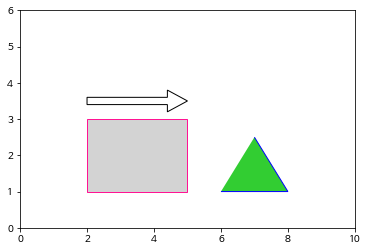

In [11]:
import matplotlib.patches as patches

fig, ax = plt.subplots()

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 6)
ax.axis([0,10,0,6]) 
ax.add_patch(
    patches.Rectangle(
        (2, 1), 3, 2, # x, y, width, height
        edgecolor = 'deeppink',
        facecolor = 'lightgray',
        fill=True,
        ))
ax.add_patch(
    patches.Arrow(
        2, 3.5, 3, 0,  # x1, y1, x2, y2
        width = 1,
        edgecolor = 'k',
        facecolor = 'w'
        ))
ax.add_patch(
    patches.Polygon(
        ((6,1), (8,1), (7,2.5)),
         closed = False,  # 닫힌 다각형, *True | False
        edgecolor = 'b',
        facecolor = 'limegreen'
        ))

plt.show()

![colormap type](./image/module_patches_table01.png)

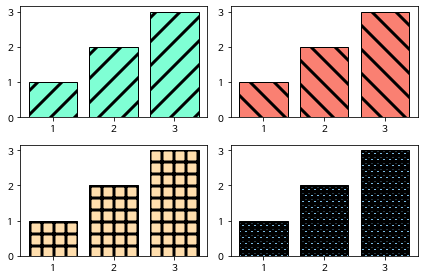

In [12]:
# 패턴 채우기
plt.rcParams['hatch.linewidth'] = 3  # 패턴 두꼐 설정
x = [1, 2, 3]
y = [1, 2, 3]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.bar(x, y, color='aquamarine', edgecolor='black', hatch='/')
ax2.bar(x, y, color='salmon', edgecolor='black', hatch='\\')
ax3.bar(x, y, color='navajowhite', edgecolor='black', hatch='+')
ax4.bar(x, y, color='lightskyblue', edgecolor='black', hatch='**')
# hatch는 / \\ | - + x o O . * 중 선택

plt.tight_layout()
plt.show()